In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import glob
sns.set()
from results import load

#constants
experiment_phase = {'p0':60000, 'p1':60000, 'p2':180000}
experiment_phase_labels = [*experiment_phase]

# Reading the results

In [7]:
#config
experiment_name = "full"
providers = ["aws","azure","ibm","gcf"] 
num_repetitions = 1
configs = ["0,0,1", "0,0,2","0,0,0.5"] # "60,60,1","60,60,2","60,60,0.5"]

all = load(experiment_name, providers,configs,num_repetitions,True)
all.columns

reading 0,0,1 aws 1
reading 0,0,1 azure 1
reading 0,0,1 ibm 1
reading 0,0,1 gcf 1
reading 0,0,2 aws 1
reading 0,0,2 azure 1
reading 0,0,2 ibm 1
reading 0,0,2 gcf 1


b'Skipping line 4058: expected 15 fields, saw 20\n'


reading 0,0,0.5 aws 1
reading 0,0,0.5 azure 1
reading 0,0,0.5 ibm 1
reading 0,0,0.5 gcf 1


Index(['RId', 'WL', 'CId', 'CStart', 'ELat', 'RSuccess', 'Phase', 'RStart',
       'EStart', 'EEnd', 'REnd', 'CPlat', 'COs', 'RInput', 'Provider', 'RLat',
       'RResult', 'run', 'sourceFile', 'RCode', 'HId'],
      dtype='object')

In [8]:
all.head()

,RId,WL,CId,CStart,ELat,RSuccess,Phase,RStart,EStart,EEnd,...,CPlat,COs,RInput,Provider,RLat,RResult,run,sourceFile,RCode,HId
8,1DK13FO3A,"0,0,1",1DK1AJT5Q,60420.0,1650.0,False,p1,67879.0,67958.0,69608.0,...,v10.16.0,linux,7500737.0,aws,1775.0,False,1.0,"results/full/0,0,1/1/aws/result-1567700175290.csv",200.0,1EN2B90
9,1DK13G645,"0,0,1",1DK1C8JRA,77722.0,1632.0,False,p1,81768.0,81786.0,83418.0,...,v10.16.0,linux,7500295.0,aws,1705.0,False,1.0,"results/full/0,0,1/1/aws/result-1567700175375.csv",200.0,1EN2BMG
10,1DK13G79H,"0,0,1",1DK14PSDD,77790.0,1598.0,False,p1,91543.0,91582.0,93180.0,...,v10.16.0,linux,7500347.0,aws,1678.0,True,1.0,"results/full/0,0,1/1/aws/result-1567700175352.csv",200.0,1EN2C93
11,1DK13GDR3,"0,0,1",1DK15J54E,84280.0,1612.0,False,p1,115795.0,115816.0,117428.0,...,v10.16.0,linux,7500305.0,aws,1690.0,False,1.0,"results/full/0,0,1/1/aws/result-1567700175278.csv",200.0,1EN2BIP
12,1DK13GGLC,"0,0,1",1DK147EAE,84023.0,1642.0,False,p1,106144.0,106186.0,107828.0,...,v10.16.0,linux,7500704.0,aws,1723.0,False,1.0,"results/full/0,0,1/1/aws/result-1567700175352.csv",200.0,1EN2BIF


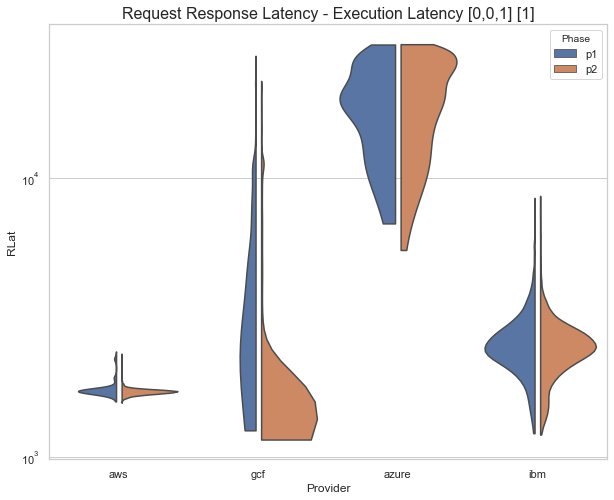

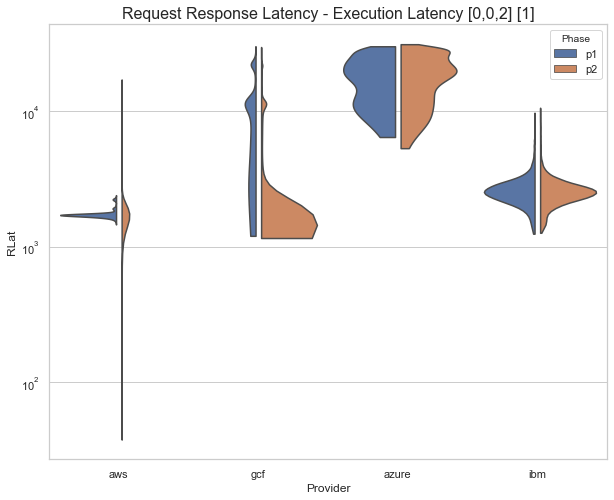

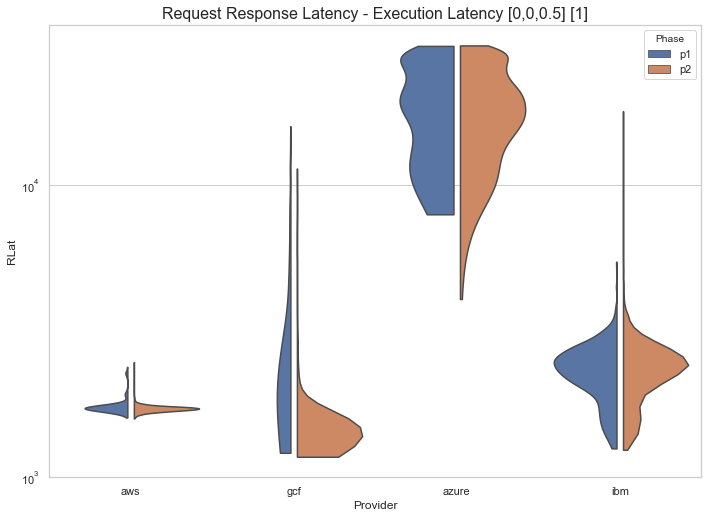

In [84]:
for config in configs:
    sns.set(style="whitegrid")
    plt.figure(figsize=(10.0, 8.0))
    plt.title("Request Response Latency - Execution Latency [%s] [%d]"%(config,run), fontsize=16)
    data = all[all["WL"] == config]
    data = data[data["RLat"].notna()]
    data = data[data["RCode"] != 429] #filters filed requests e.g. azure
    data = data[data["Phase"] != "none"]
    inner = None
    ax = sns.violinplot(x='Provider', y='RLat', data=data, hue='Phase', scale='area', split=True, inner=inner ,cut=0)
    plt.yscale('log')
    delta = 0.02
    delta = 0.02
    
    #code for gap between violin halves, from stackoverflow.com/questions/43357274/
    for ii, item in enumerate(ax.collections):
    # axis contains PolyCollections and PathCollections
        if isinstance(item, matplotlib.collections.PolyCollection):
        # get path
            path, = item.get_paths()
            vertices = path.vertices

        # shift x-coordinates of path
            if not inner:
                if ii % 2: # -> to right
                    vertices[:,0] += delta
                else: # -> to left
                    vertices[:,0] -= delta
            else: # inner='box' adds another type of PollyCollection
                if ii % 3 == 0:
                    vertices[:,0] -= delta
                elif ii % 3 == 1:
                    vertices[:,0] += delta
                else: # ii % 3 = 2
                    pass
                
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Thrughput

### Performance

### Exec and NonExec Lat 

### Failed Requests